<a href="https://colab.research.google.com/github/Ryanjscott/retail-sales-analysis/blob/main/retail_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('retail_data.csv', encoding='latin1')

In [ ]:
df.shape

(9994, 21)

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors = 'coerce')

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.groupby('Category')['Sales'].sum().sort_values(ascending = False)

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


<Axes: title={'center': 'Monthly Sales'}, xlabel='Month'>

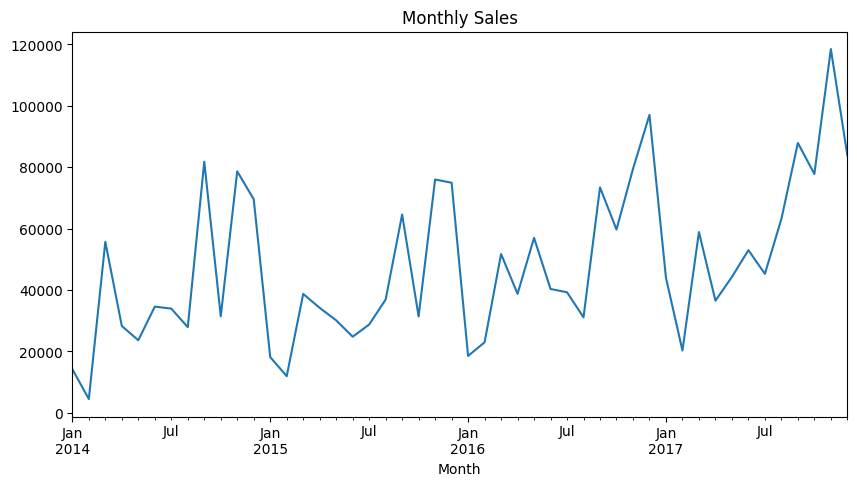

In [ ]:
df['Month'] = df['Order Date'].dt.to_period('M')
df.groupby('Month')['Sales'].sum().plot(kind = 'line', figsize = (10, 5), title = 'Monthly Sales')

<Axes: title={'center': 'Monthly Sales'}, xlabel='Month'>

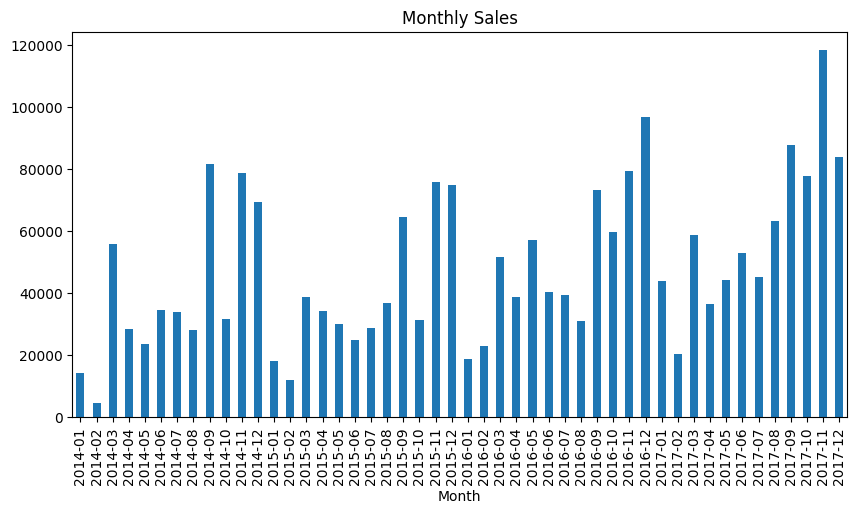

In [ ]:
df['Month'] = df['Order Date'].dt.to_period('M')
df.groupby('Month')['Sales'].sum().plot(kind = 'bar', figsize = (10, 5), title = 'Monthly Sales')

In [ ]:
df['Order ID'].nunique()
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
df.groupby('Order ID')['Sales'].sum().mean()

np.float64(458.61466566180883)

Text(0, 0.5, 'Total Sales ($)')

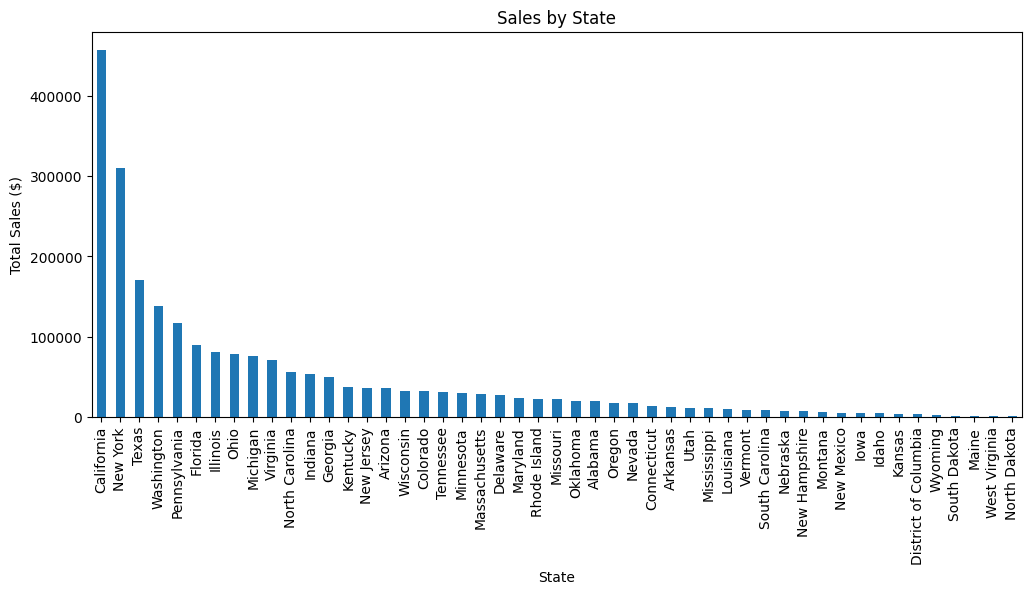

In [ ]:
df.groupby('State')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.title('Sales by State')
plt.ylabel('Total Sales ($)')

Text(0.5, 1.0, 'Sales by Sub-Category')

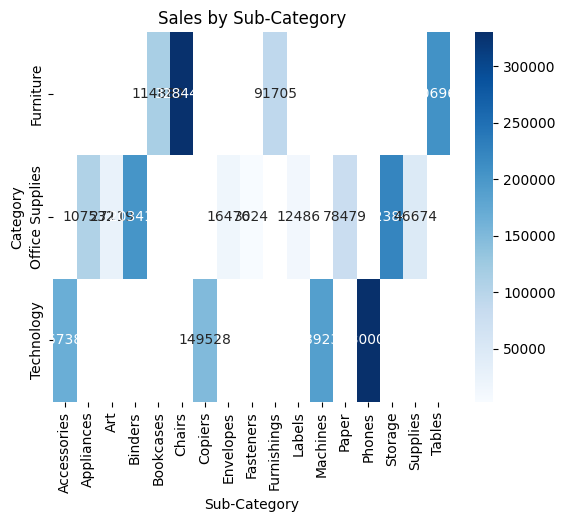

In [ ]:
pivot = df.pivot_table(values='Sales', index='Category', columns='Sub-Category', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Sales by Sub-Category')

In [ ]:
summary = df.groupby('Category').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'
}).sort_values('Sales', ascending=False)
print(summary)

                       Sales  Quantity       Profit
Category                                           
Technology       836154.0330      6939  145454.9481
Furniture        741999.7953      8028   18451.2728
Office Supplies  719047.0320     22906  122490.8008


In [41]:
df.to_csv('retail_data_cleaned.csv', index=False)